In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math as math

In [3]:
 def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

#### Comparación de Heurísticas Golosas ####

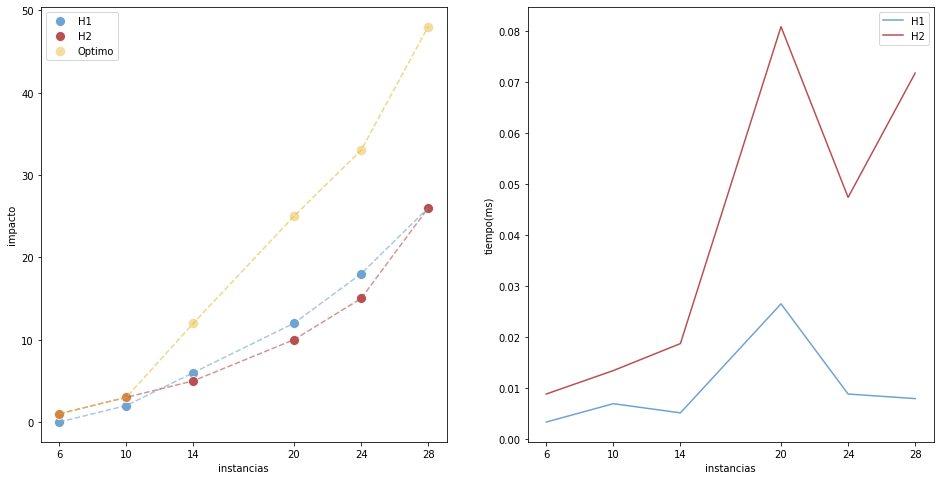

In [58]:
colors = ["#70a3d0", "#b75151", "#e8bc3d", "#51b788", "#e8bc3d", "black"];
instancias = [6, 10, 14, 20, 24, 28];
instancias__ = [6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30];
labels = [];
i = 0;
fig, axs = plt.subplots(1, 2);
fig.set_figwidth(16);
fig.set_figheight(8);

data_H1 = pd.read_csv(F"experimentos/heuristica_H1.csv");
data_H2 = pd.read_csv(F"experimentos/heuristica_H2.csv");

# Impacto
fig = sns.scatterplot(data=data_H1, x="instancia", y="impacto", color=colors[0], s=100, ax=axs[0]);
fig = sns.scatterplot(data=data_H2, x="instancia", y="impacto", color=colors[1], s=100, ax=axs[0]);
fig = sns.scatterplot(data=data_H1, x="instancia", y="optimo", color=colors[2], s=100, alpha=0.5, ax=axs[0]);

labels = ["H1", "H2", "Optimo"];
axs[0].legend(labels=labels);

fig = sns.lineplot(data=data_H1, x="instancia", y="impacto", color=colors[0], linestyle="dashed", alpha=0.6, ax=axs[0]);
fig = sns.lineplot(data=data_H2, x="instancia", y="impacto", color=colors[1], linestyle="dashed", alpha=0.6, ax=axs[0]);
fig = sns.lineplot(data=data_H1, x="instancia", y="optimo", color=colors[2], linestyle="dashed", alpha=0.6, ax=axs[0]);

# Tiempo
fig = sns.lineplot(data=data_H1, x="instancia", y="tiempo(ms)", color=colors[0], ax=axs[1]);
fig = sns.lineplot(data=data_H2, x="instancia", y="tiempo(ms)", color=colors[1], ax=axs[1]);

axs[0].set(xlabel='instancias', ylabel='impacto');
axs[0].set_xticks(instancias);
axs[1].legend(labels=labels);
axs[1].set(xlabel='instancias', ylabel='tiempo(ms)');
axs[1].set_xticks(instancias);

plt.savefig("graficos/heuristicas_golosas_tabu.svg");  

#### Comparación de heurísticas golosas en algoritmos tabú ####

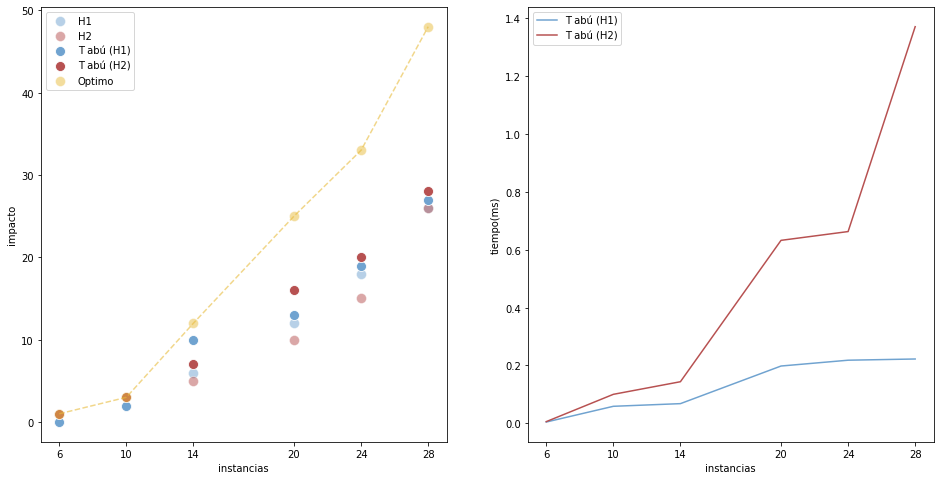

In [91]:
colors = ["#70a3d0", "#b75151", "#e8bc3d", "#51b788", "#e8bc3d", "black"];
instancias = [6, 10, 14, 20, 24, 28];
instancias__ = [6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30];
labels = [];
i = 0;
fig, axs = plt.subplots(1, 2);
fig.set_figwidth(16);
fig.set_figheight(8);

tabu = "TABU4";

data_H1 = pd.read_csv(F"experimentos/heuristica_H1.csv");
data_H2 = pd.read_csv(F"experimentos/heuristica_H2.csv");

data_TABU_H1 = pd.read_csv(F"experimentos/{tabu}_H1_heuristica.csv");
data_TABU_H2 = pd.read_csv(F"experimentos/{tabu}_H2_heuristica.csv");

# Golosas
fig = sns.scatterplot(data=data_H1, x="instancia", y="impacto", color=colors[0], alpha=0.5, s=100, ax=axs[0]);
fig = sns.scatterplot(data=data_H2, x="instancia", y="impacto", color=colors[1], alpha=0.5, s=100, ax=axs[0]);
# Tabu
fig = sns.scatterplot(data=data_TABU_H1, x="instancia", y="impacto", color=colors[0], s=100, ax=axs[0]);
fig = sns.scatterplot(data=data_TABU_H2, x="instancia", y="impacto", color=colors[1], s=100, ax=axs[0]);
# Optimo
fig = sns.scatterplot(data=data_H1, x="instancia", y="optimo", color=colors[2], s=100, alpha=0.5, ax=axs[0]);

labels = ["H1", "H2", "T abú (H1)", "T abú (H2)", "Optimo"];
axs[0].legend(labels=labels);

fig = sns.lineplot(data=data_TABU_H1, x="instancia", y="optimo", color=colors[2], linestyle="dashed", alpha=0.6, ax=axs[0]);

# Tiempo
fig = sns.lineplot(data=data_TABU_H1, x="instancia", y="tiempo(ms)", color=colors[0], ax=axs[1]);
fig = sns.lineplot(data=data_TABU_H2, x="instancia", y="tiempo(ms)", color=colors[1], ax=axs[1]);

axs[0].set(xlabel='instancias', ylabel='impacto');
axs[0].set_xticks(instancias);
axs[1].legend(labels=["T abú (H1)", "T abú (H2)"]);
axs[1].set(xlabel='instancias', ylabel='tiempo(ms)');
axs[1].set_xticks(instancias);

plt.savefig("graficos/heuristicas_golosas_tabu4.svg");  

#### Grafico 1 - (distintas iteraciones) ####

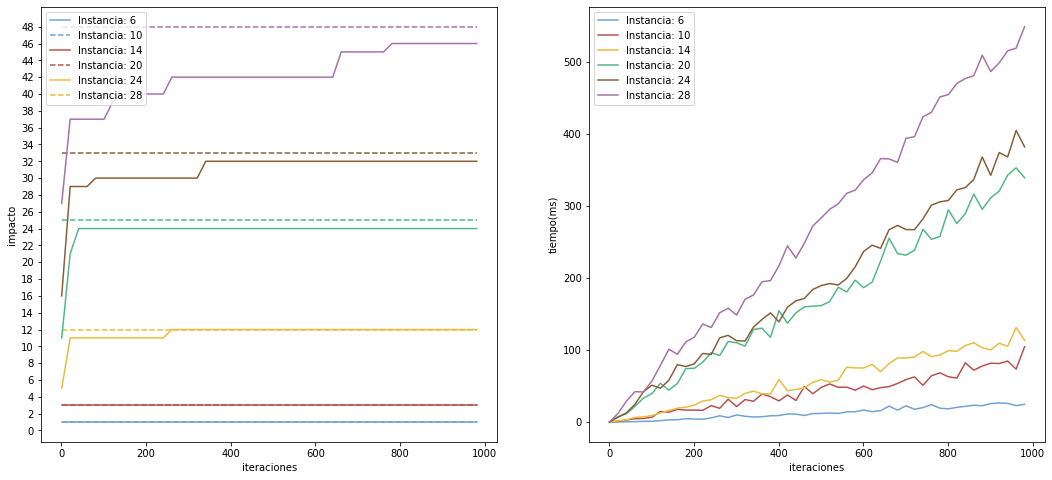

In [156]:
colors = ["#70a3d0", "#b75151", "#e8bc3d", "#51b788", "#875E37", "#A671A8"];
instancias = [6, 10, 14, 20, 24, 28];
labels = [];
i = 0;
fig, axs = plt.subplots(1, 2);
fig.set_figwidth(18);
fig.set_figheight(8);

tabu = "TABU3";

for instancia in instancias:
    data = pd.read_csv(F"experimentos/{tabu}_n{instancia}_iteraciones_1_1000_final.csv");
    
    # Impacto
    fig = sns.lineplot(data=data, x="iteraciones", y="impacto", color=colors[i], ax=axs[0]);
    fig = sns.lineplot(data=data, x="iteraciones", y="optimo", color=colors[i], linestyle="dashed", ax=axs[0]);
    
    # Tiempo
    fig = sns.lineplot(data=data, x="iteraciones", y="tiempo(ms)", color=colors[i], ax=axs[1]);
    
    labels.append(F"Instancia: {instancia}");
    i = i + 1;


axs[0].legend(labels=labels);
axs[0].set(xlabel='iteraciones', ylabel='impacto');
axs[0].set_yticks(range(0, 50, 2));
axs[1].legend(labels=labels);
axs[1].set(xlabel='iteraciones', ylabel='tiempo(ms)');

plt.savefig("graficos/iteraciones_tabu3_1000_final.svg");  

#### Grafico 2 - (distintas vecindades) ####

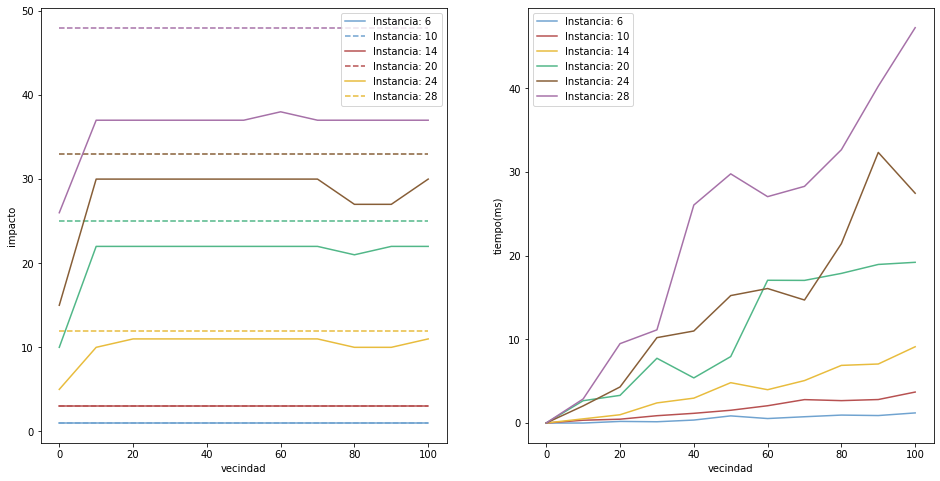

In [175]:
colors = ["#70a3d0", "#b75151", "#e8bc3d", "#51b788", "#875E37", "#A671A8"];
instancias = [6, 10, 14, 20, 24, 28];
labels = [];
i = 0;
fig, axs = plt.subplots(1, 2);
fig.set_figwidth(16);
fig.set_figheight(8);

tabu = "TABU3";

for instancia in instancias:
    data = pd.read_csv(F"experimentos/{tabu}_n{instancia}_vecindad.csv");
    
    # Impacto
    fig = sns.lineplot(data=data, x="vecindad", y="impacto", color=colors[i], ax=axs[0]);
    fig = sns.lineplot(data=data, x="vecindad", y="optimo", color=colors[i], linestyle="dashed", ax=axs[0]);
    
    # Tiempo
    fig = sns.lineplot(data=data, x="vecindad", y="tiempo(ms)", color=colors[i], ax=axs[1]);
    
    labels.append(F"Instancia: {instancia}");
    i = i + 1;


axs[0].legend(labels=labels);
axs[0].set(xlabel='vecindad', ylabel='impacto');
axs[1].legend(labels=labels);
axs[1].set(xlabel='vecindad', ylabel='tiempo(ms)');

plt.savefig("graficos/vecindad_tabu3.svg");  

#### Grafico 3 - (distinta memoria) ####

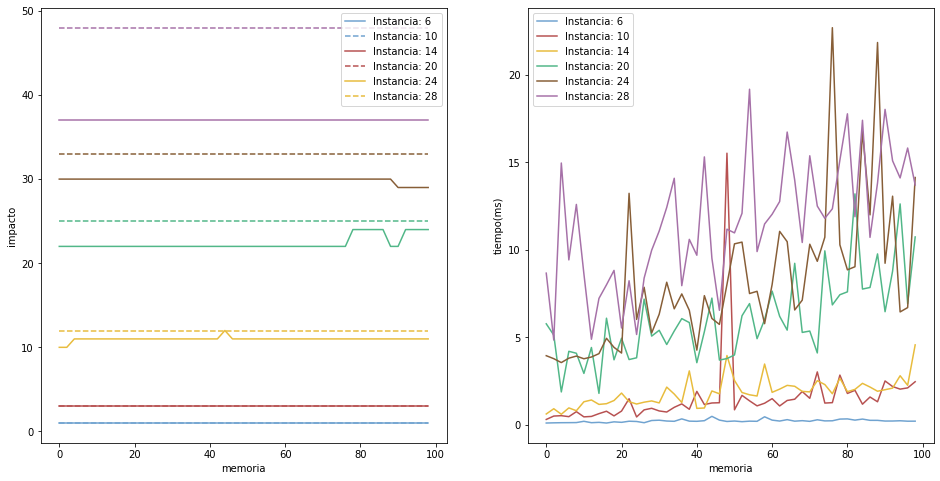

In [177]:
colors = ["#70a3d0", "#b75151", "#e8bc3d", "#51b788", "#875E37", "#A671A8"];
instancias = [6, 10, 14, 20, 24, 28];
labels = [];
i = 0;
fig, axs = plt.subplots(1, 2);
fig.set_figwidth(16);
fig.set_figheight(8);

tabu = "TABU3";

for instancia in instancias:
    data = pd.read_csv(F"experimentos/{tabu}_n{instancia}_memoria.csv");
    
    # Impacto
    fig = sns.lineplot(data=data, x="memoria", y="impacto", color=colors[i], ax=axs[0]);
    fig = sns.lineplot(data=data, x="memoria", y="optimo", color=colors[i], linestyle="dashed", ax=axs[0]);
    
    # Tiempo
    fig = sns.lineplot(data=data, x="memoria", y="tiempo(ms)", color=colors[i], ax=axs[1]);
    
    labels.append(F"Instancia: {instancia}");
    i = i + 1;


axs[0].legend(labels=labels);
axs[0].set(xlabel='memoria', ylabel='impacto');
axs[1].legend(labels=labels);
axs[1].set(xlabel='memoria', ylabel='tiempo(ms)');

plt.savefig("graficos/memoria_tabu3.svg");  

#### Experimento 3: Instancias Complementarias ####

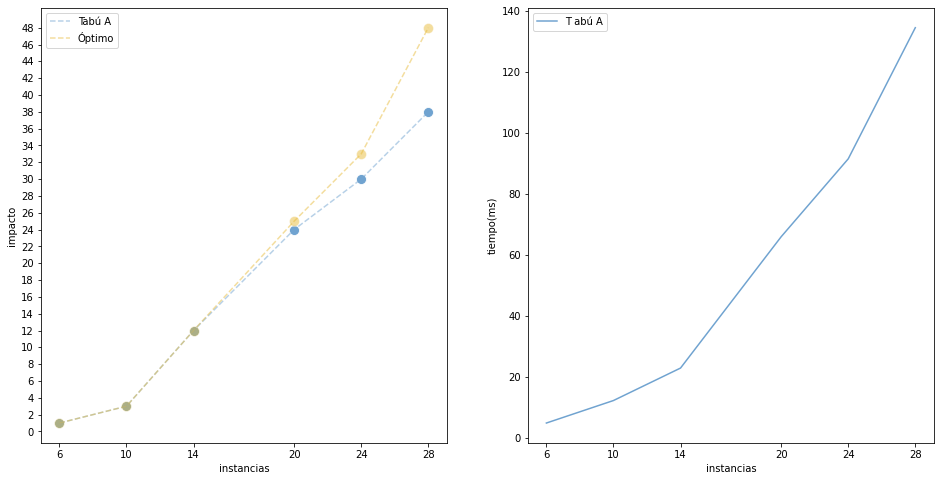

In [185]:
colors = ["#70a3d0", "#b75151", "#e8bc3d", "#51b788", "#e8bc3d", "black"];
instancias = [6, 10, 14, 20, 24, 28];
complementarias = [8, 12, 16, 18, 22, 26, 30];
labels = [];
i = 0;
fig, axs = plt.subplots(1, 2);
fig.set_figwidth(16);
fig.set_figheight(8);

tabu = "TABU3";

data = pd.read_csv(F"experimentos/{tabu}_experimento3.csv");

# Tabu
fig = sns.scatterplot(data=data, x="instancia", y="impacto", color=colors[0], s=100, ax=axs[0]);
fig = sns.lineplot(data=data, x="instancia", y="impacto", color=colors[0], linestyle="dashed", alpha=0.5, ax=axs[0]);
# Optimo
fig = sns.scatterplot(data=data, x="instancia", y="optimo", color=colors[2], s=100, alpha=0.5, ax=axs[0]);
fig = sns.lineplot(data=data, x="instancia", y="optimo", color=colors[2], linestyle="dashed", alpha=0.5, ax=axs[0]);

labels = ["Tabú A", "Óptimo"];
axs[0].legend(labels=labels);

# Tiempo
fig = sns.lineplot(data=data, x="instancia", y="tiempo(ms)", color=colors[0], ax=axs[1]);

axs[0].set(xlabel='instancias', ylabel='impacto');
axs[0].set_xticks(instancias);
axs[0].set_yticks(range(0, 50, 2));
axs[1].legend(labels=["T abú A"]);
axs[1].set(xlabel='instancias', ylabel='tiempo(ms)');
axs[1].set_xticks(instancias);

plt.savefig("graficos/experimento3_tabu3_instancias_originales.svg");  